In [68]:
import sksurv
import os
import pandas as pd

In [69]:
os.chdir('U:\\ProjectDataset')

In [70]:
dt=pd.read_excel('gene + clinical LUSC.xlsx')


In [71]:
dt=dt.set_index(dt.columns[0])

In [87]:
c=pd.read_excel('cox LUSC.xlsx')

In [100]:
result=c.to_records(index=False)

In [101]:
c['Patient\'s Vital Status' ]=c['Patient\'s Vital Status' ].astype('bool')

In [102]:
print(c.columns)

Index(['Patient's Vital Status', 'Overall Survival'], dtype='object')


In [103]:
result

rec.array([(False, 1.2190e+01), (False, 4.4700e+00), (False, 7.5690e+01),
           ( True, 1.2309e+02), (False, 4.8000e+00), ( True, 1.1748e+02),
           (False, 1.1330e+01), (False, 2.3520e+01), (False, 9.2080e+01),
           (False, 3.1960e+01), (False, 3.6040e+01), ( True, 9.2350e+01),
           ( True, 8.6890e+01), (False, 6.1800e+00), (False, 2.7900e+00),
           ( True, 1.5420e+02), ( True, 4.9900e+01), (False, 2.7170e+01),
           ( True, 1.1945e+02), (False, 4.6850e+01), ( True, 9.9080e+01),
           ( True, 7.0110e+01), ( True, 6.0840e+01), (False, 3.4760e+01),
           (False, 1.5570e+01), (False, 3.1700e+01), ( True, 1.2234e+02),
           (False, 9.3300e+00), ( True, 1.1971e+02), (False, 4.3200e+01),
           (False, 3.1600e+01), (False, 8.8040e+01), ( True, 4.1660e+01),
           ( True, 3.3900e+01), (False, 1.0810e+01), ( True, 3.2160e+01),
           (False, 2.1980e+01), (False, 7.3300e+00), (False, 1.4910e+01),
           (False, 4.3000e+00), (False

In [82]:
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(dt, result)


iter     12: optimization converged


CoxPHSurvivalAnalysis(alpha=1, n_iter=100, tol=1e-09, verbose=1)

In [83]:
pd.Series(estimator.coef_, index=dt.columns)

A4GALT                                                            -0.746004
AASDHPPT                                                           0.159038
ABCA4                                                              1.131167
ABCC1                                                              0.894321
ACER3                                                              0.001257
ACSM3                                                             -0.367472
ACTN1                                                              0.119693
ADCY5                                                             -0.669611
AFF2                                                              -0.263385
ALKBH6                                                            -0.368259
ANO5                                                              -0.412230
ANXA11                                                             0.856122
ANXA1                                                              0.193217
APC2        

In [84]:
from sksurv.metrics import concordance_index_censored

prediction = estimator.predict(dt)
result = concordance_index_censored(c['Patient\'s Vital Status'], c['Overall Survival'], prediction)
result[0]

0.9883448130658405

Text(0.5,0,'time $t$')

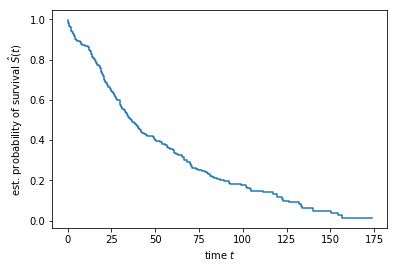

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(c['Patient\'s Vital Status'], c['Overall Survival'])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dt,result,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)
from sksurv.metrics import concordance_index_censored
print('train score')
prediction = estimator.predict(X_train)
result = concordance_index_censored(Y_train['Patient\'s Vital Status'], Y_train['Overall Survival'], prediction) 
result[0]

(350, 331) (350,)
(151, 331) (151,)
iter     16: optimization converged
train score


0.9990301285861778

In [96]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator,X_train,Y_train,cv=5))

iter     22: optimization converged
iter     18: optimization converged
iter     26: optimization converged
iter     17: optimization converged
iter     26: optimization converged
[0.83880825 0.84569536 0.84583333 0.79810726 0.79071884]


In [44]:
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Overall Survival'], prediction)
result[0]

0.8175064599483204

In [105]:
dt1=pd.read_excel('selected gene no depth LUSC.xlsx')

In [106]:
dt1=dt1.set_index(dt1.columns[0])

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(dt1,result,test_size=0.3)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
from sksurv.linear_model import CoxPHSurvivalAnalysis
estimator = CoxPHSurvivalAnalysis(alpha=1,verbose=1)
estimator.fit(X_train, Y_train)
from sksurv.metrics import concordance_index_censored
print('train score')
prediction = estimator.predict(X_train)
result = concordance_index_censored(Y_train['Patient\'s Vital Status'], Y_train['Overall Survival'], prediction) 
result[0]

(350, 2794) (350,)
(151, 2794) (151,)
iter     27: optimization converged
train score


1.0

In [110]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator,X_train,Y_train,cv=5))

iter     21: optimization converged
iter     25: optimization converged
iter    101: reached maximum number of iterations. Stopping.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sksurv\linear_model\coxph.py:385: RuntimeWarning: invalid value encountered in true_divide
  y = numpy.cumsum(n_events / divisor)


iter     31: optimization converged
iter     18: optimization converged
[0.78754325 0.74402467 0.7322695  0.72940226 0.71236133]


In [113]:
print('test')
from sksurv.metrics import concordance_index_censored
prediction = estimator.predict(X_test)
result = concordance_index_censored(Y_test['Patient\'s Vital Status'], Y_test['Overall Survival'], prediction)
result[0]

test


0.7723300970873787

In [117]:
pd.Series(estimator.coef_, index=X_train.columns).sort_values(ascending=False)

Patient's Vital Status                                             1.140419
Overall Survival Status                                            1.140419
BIRC7                                                              1.076871
ACAP2                                                              0.915036
ALDH3A1                                                            0.754801
Neoplasm Disease Stage American Joint Committee on Cancer Code3    0.740508
C5ORF52                                                            0.726700
SLC18B1                                                            0.689853
C5ORF47                                                            0.689134
CAND1                                                              0.681710
ALOX12                                                             0.672940
ALCAM                                                              0.647311
SETD9                                                              0.615421
VSTM5       

In [118]:
0.78754325+0.74402467+0.7322695+0.72940226+0.71236133

3.7056010100000005

In [119]:

3.7056010100000005/5

0.7411202020000001

In [ ]:
33979+15530.98